In [2]:
import cv2
import glob
import numpy as np
from matplotlib import pyplot as plt

from modules import image

## create bg img

In [3]:
bg_dir_path = "../../data/2022_01_23/bg/"
z_range = [0, 100, 1]
bg = image.bg(bg_dir_path=bg_dir_path, z_range=z_range, mode=0)

## show bg img

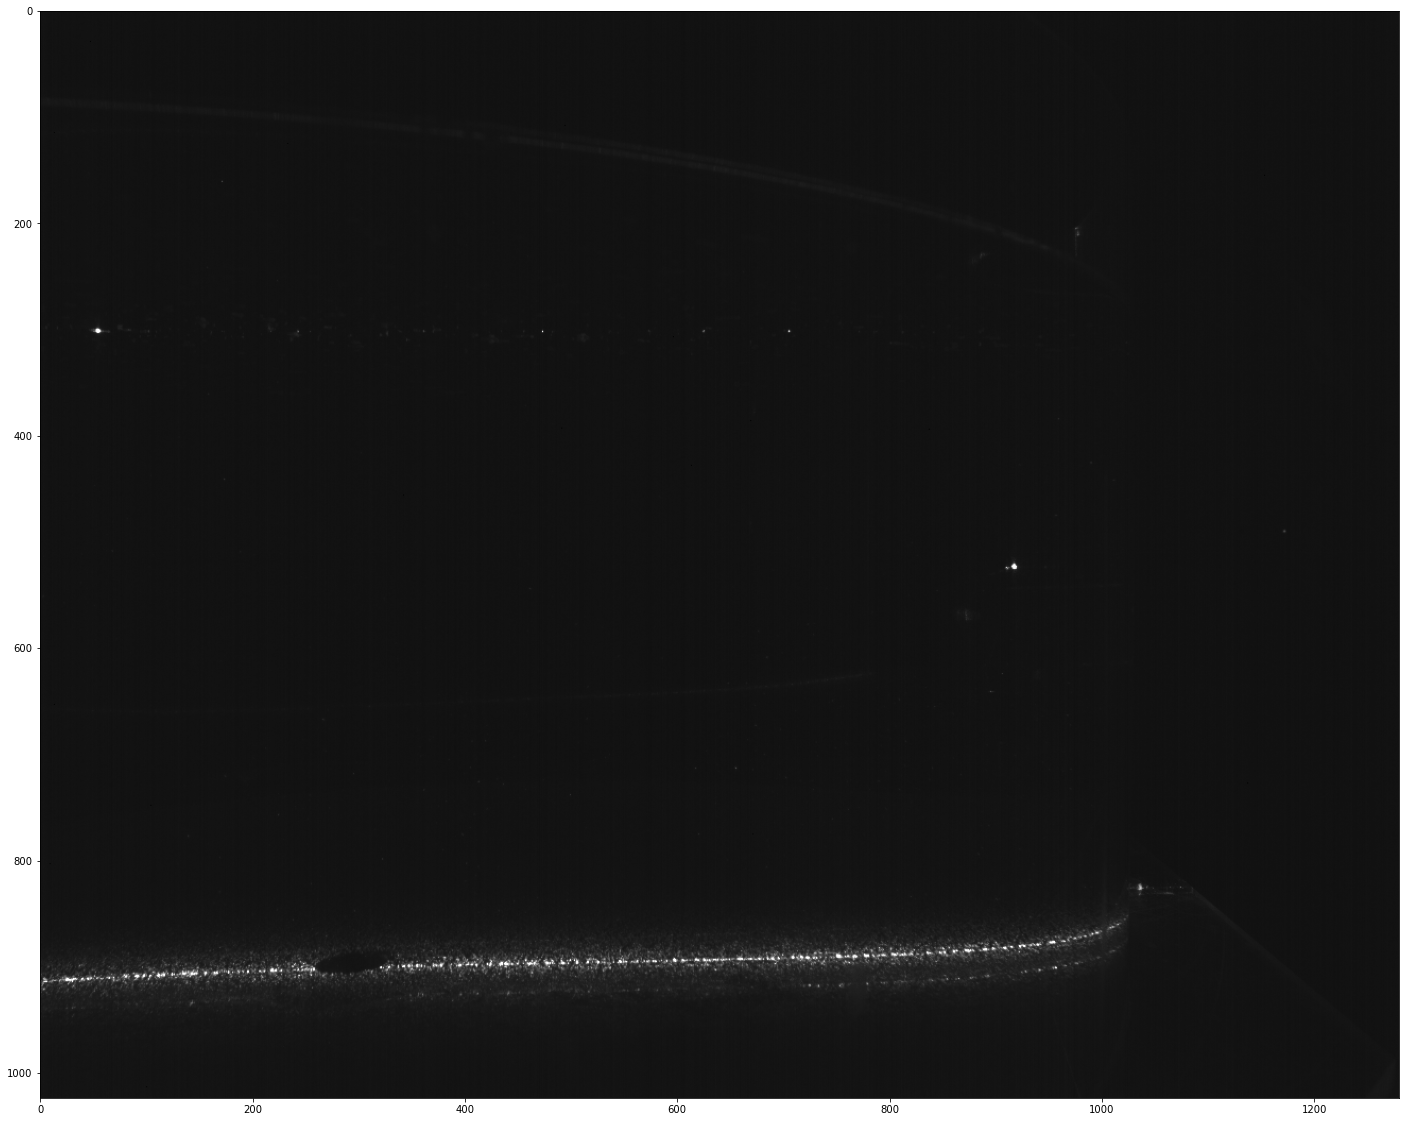

In [4]:
fig = plt.figure(figsize=(32, 20))
plt.imshow(bg, cmap="gray")
plt.show()

## calibration

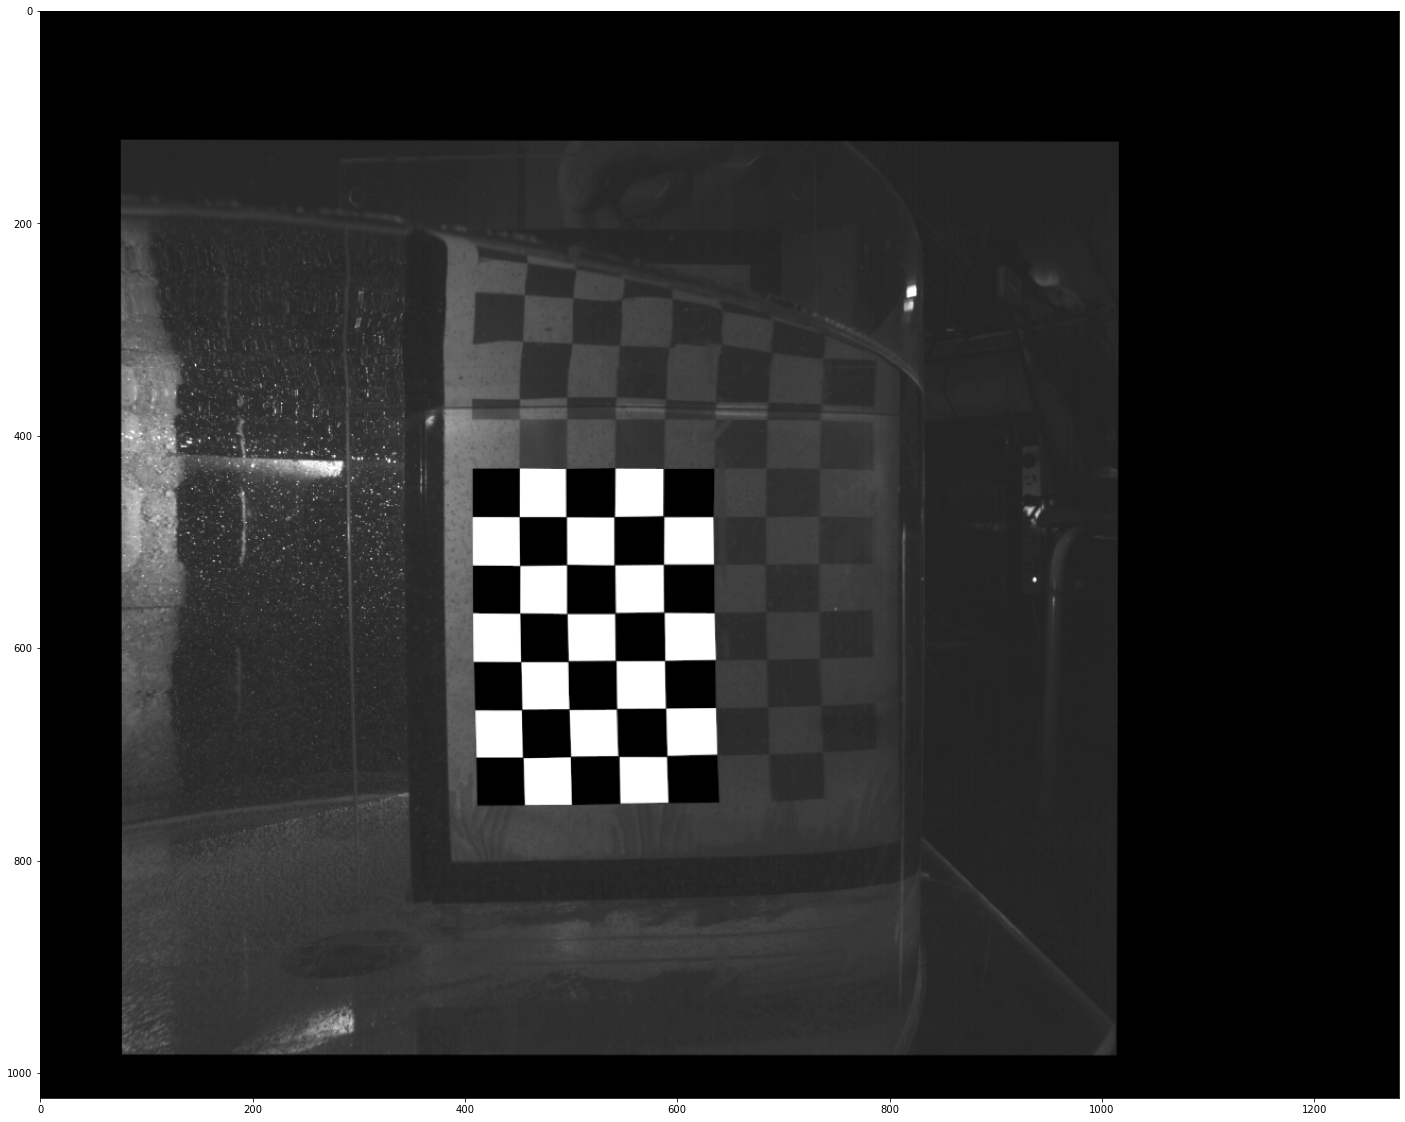

In [12]:
chess_img = cv2.imread("../../data/2022_01_23/calib/aaa.bmp", 0)

fig = plt.figure(figsize=(32, 20))
plt.imshow(chess_img, cmap="gray")
plt.show()

In [16]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)


In [22]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((4*6,3), np.float32)
objp[:,:2] = np.mgrid[0:6,0:4].T.reshape(-1,2)


In [23]:
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.


In [24]:
img = cv2.imread("../../data/2022_01_23/calib/aaa.bmp")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Find the chess board corners
ret, corners = cv2.findChessboardCorners(gray, (6, 4), None)

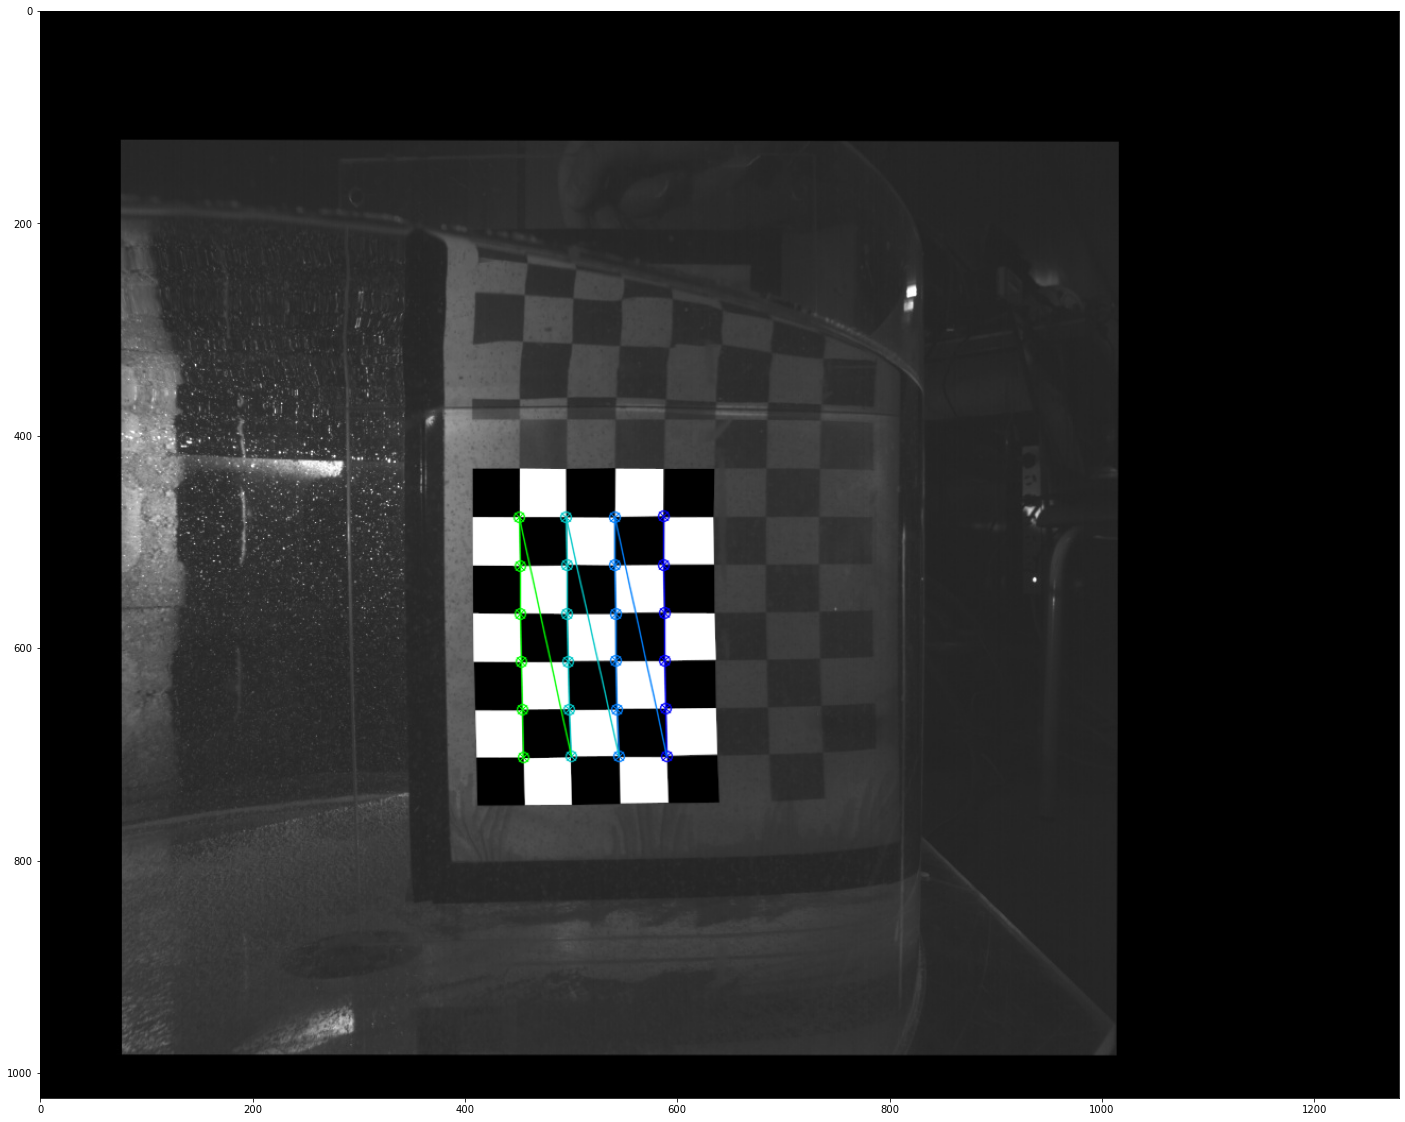

In [25]:
# If found, add object points, image points (after refining them)
if ret:
    objpoints.append(objp)

    corners2 = cv2.cornerSubPix(gray, corners,(11,11),(-1,-1),criteria)
    imgpoints.append(corners2)

    # Draw and display the corners
    img = cv2.drawChessboardCorners(img, (6,4), corners2,ret)
    fig = plt.figure(figsize=(32, 20))
    plt.imshow(img, cmap="gray")
    plt.show()

In [26]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)

In [27]:
img = cv2.imread("../../data/2022_01_23/calib/aaa.bmp")
h,  w = img.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))

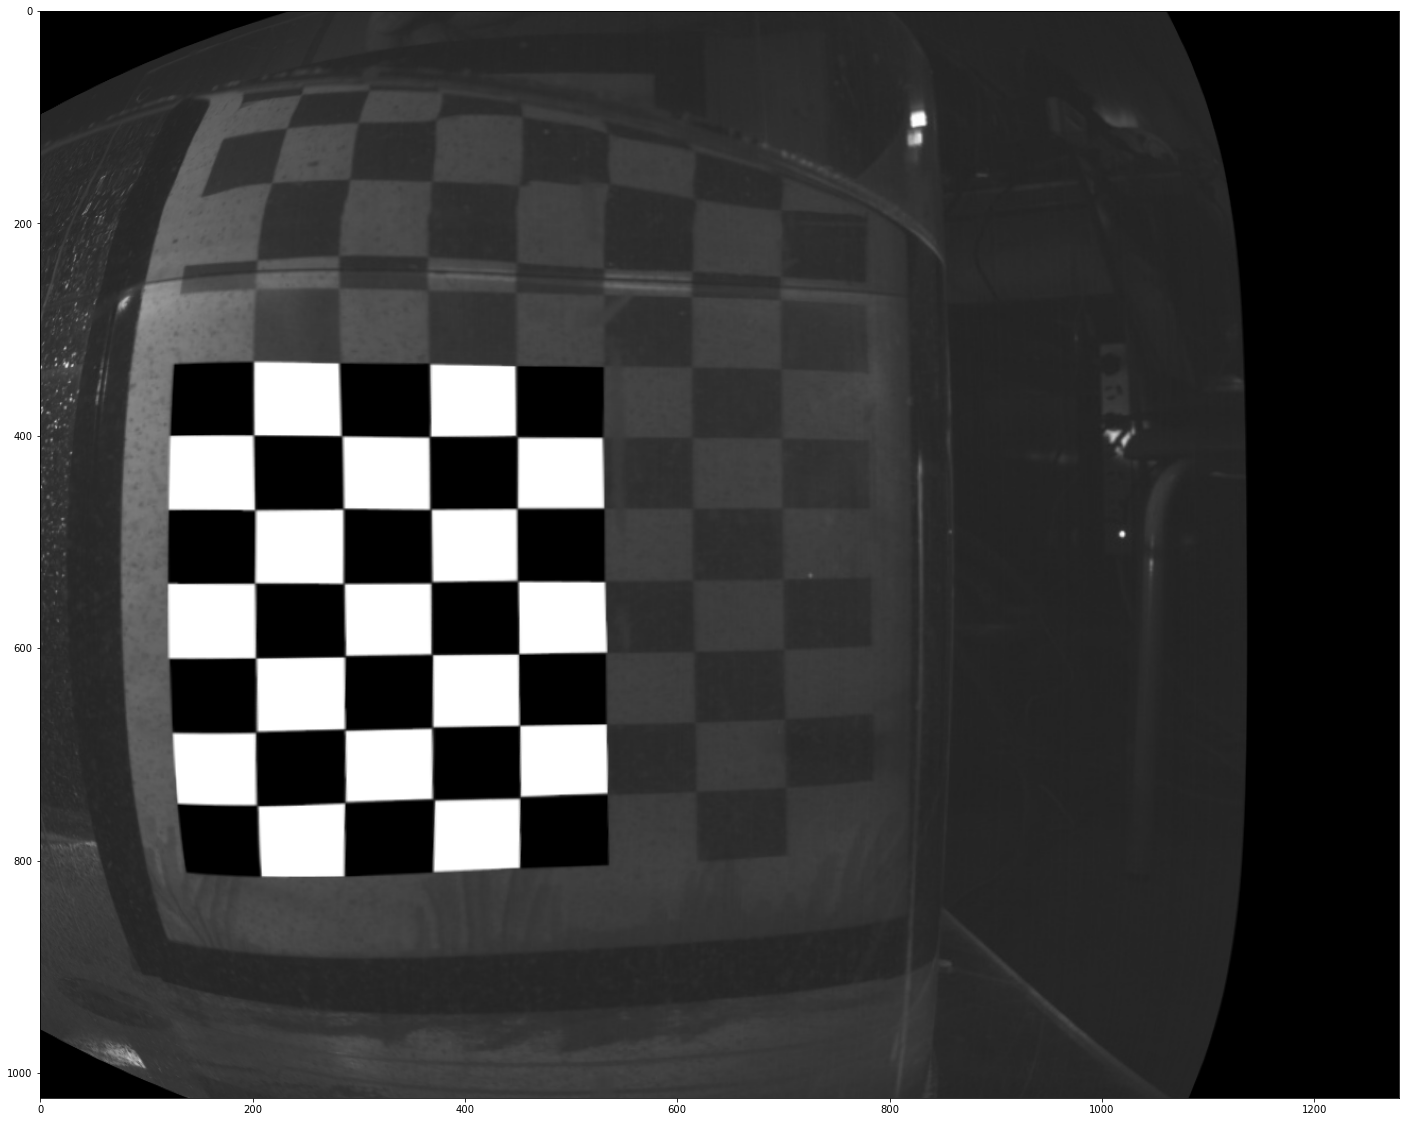

In [28]:
# undistort
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)

# # crop the image
# x,y,w,h = roi
# dst = dst[y:y+h, x:x+w]
fig = plt.figure(figsize=(32, 20))
plt.imshow(dst, cmap="gray")
plt.show()

In [ ]:
# undistort
mapx,mapy = cv2.initUndistortRectifyMap(mtx,dist,None,newcameramtx,(w,h),5)
dst = cv2.remap(img,mapx,mapy,cv2.INTER_LINEAR)

# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
fig = plt.figure(figsize=(32, 20))
plt.imshow(dst, cmap="gray")
plt.show()

In [ ]:
R = 726
n_i, n_o = 1.49, 1

In [ ]:
# get center
c = cv2.imread("../../data/2022_01_23/calib/center.bmp", 0)

c_line = np.zeros(1024, dtype=int)

for j in range(1024):
    for i in range(1280):
        if c[j, i] != 0:
            c_line[j] = int(i)


In [ ]:
im1 = cv2.imread("../../data/2022_01_23/calib/_00002000.bmp", 0)
im2 = np.zeros_like(im1)

for j in range(1024):
    if c_line[j] != 0:
        for i in range(c_line[j], 1016):
            # calc k
            _r = i - c_line[j]
            k = n_i / n_o * np.sqrt((1 - (_r / R)**2) * (1 - (n_o / n_i * _r / R)**2)) + (_r / R)**2

            # calib
            r = _r / k
            ii = int(r + c_line[j])
            im2[j, ii] = im1[j, i]


In [ ]:
fig = plt.figure(figsize=(32, 20))
plt.imshow(im2, cmap="gray")
plt.show()

In [ ]:
cv2.imwrite('ca1.png',im2)